## 均一データの生成

     x    y             F           r
0 -100 -100 -11179.738270  141.421356
1  -99 -100 -17800.213958  140.716026
2  -98 -100 -14710.310079  140.014285
3  -97 -100  -8204.534004  139.316187
4  -96 -100  -9878.210049  138.621788
num samples: 40401


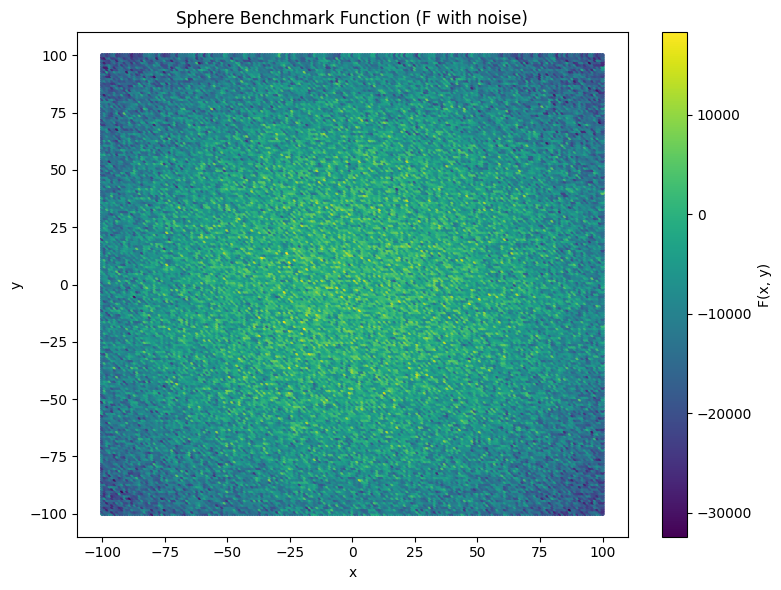

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 目的関数（Sphere 型を最大化用に符号反転）
def F_sphere(x, y):
    return -(x**2 + y**2)

# 探索空間の定義（数理モデルと対応）
xmin, xmax = -100, 100
ymin, ymax = -100, 100
step = 1  # 1刻み ⇒ 201 × 201 = 40401 点

xs = np.arange(xmin, xmax + step, step)
ys = np.arange(ymin, ymax + step, step)
X, Y = np.meshgrid(xs, ys)

x_flat = X.ravel()
y_flat = Y.ravel()

F_vals = F_sphere(x_flat, y_flat)

# Fに微小な誤差を追加
np.random.seed(0)  # 再現性のためシード固定（必要なら）
noise_scale = 5000.0  # 誤差の大きさ（以前より大きく設定）
noise = np.random.normal(0, noise_scale, size=F_vals.shape)
F_vals_noisy = F_vals + noise

r_vals = np.sqrt(x_flat**2 + y_flat**2)

df = pd.DataFrame({
    "x": x_flat,
    "y": y_flat,
    "F": F_vals_noisy,
    "r": r_vals,
})

print(df.head())
print("num samples:", len(df))

# 検証用に CSV で保存（必要なら）
df.to_csv("../data/sphere_benchmark_xy_F.csv", index=False)

# プロット
plt.figure(figsize=(8,6))
sc = plt.scatter(df["x"], df["y"], c=df["F"], cmap="viridis", s=5)
plt.colorbar(sc, label="F(x, y)")
plt.title("Sphere Benchmark Function (F with noise)")
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()
plt.show()

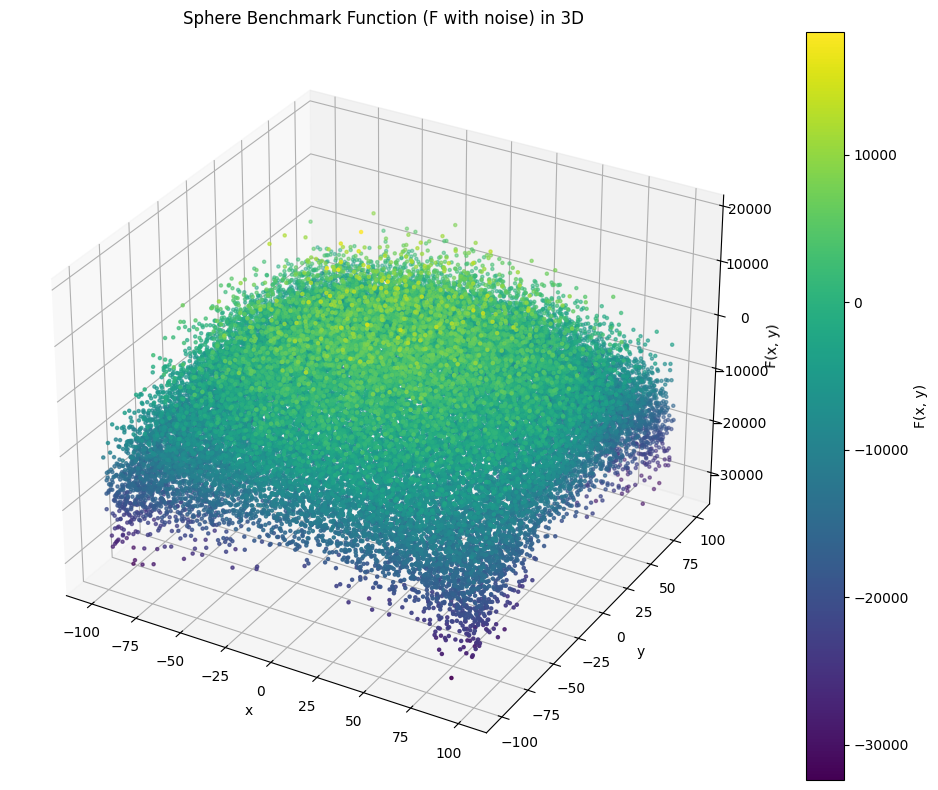

In [36]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df["x"], df["y"], df["F"], c=df["F"], cmap="viridis", s=5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('F(x, y)')
fig.colorbar(sc, ax=ax, label="F(x, y)")
ax.set_title("Sphere Benchmark Function (F with noise) in 3D")
plt.tight_layout()
plt.show()


## 不均一のデータ生成

サンプリング後のデータ数: 404
        x   y             F           r
11131 -24 -45   4753.158464   51.000000
39571  75  96 -17507.214617  121.823643
33927  59  68 -14123.874448   90.027773
27533  97  36 -17356.478563  103.464970
3060  -55 -85 -11967.089320  101.242284


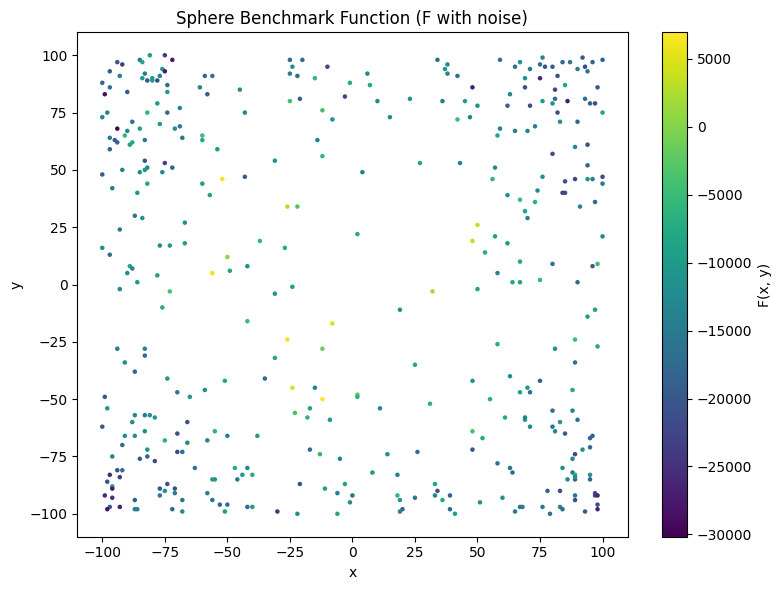

In [35]:
# ランダム(偏りあり)に1%データをサンプリングする例
# 今回はFが大きいほどサンプリングされやすいように重みをつける（偏りありサンプリング）
sample_frac = 0.01
# サンプル重みを正規化 (Fが大きいほど優先的に選ばれる)
weights = df["F"] - df["F"].min() + df["F"]**2   # minを0に近づけて負の値回避
weights = weights / weights.sum()
df_sampled = df.sample(frac=sample_frac, weights=weights, random_state=42)
print(f"サンプリング後のデータ数: {len(df_sampled)}")
print(df_sampled.head())

plt.figure(figsize=(8,6))
sc = plt.scatter(df_sampled["x"], df_sampled["y"], c=df_sampled["F"], cmap="viridis", s=5)
plt.colorbar(sc, label="F(x, y)")
plt.title("Sphere Benchmark Function (F with noise)")
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()
plt.show()

df.to_csv("../data/sphere_sampled_benchmark_xy_F.csv", index=False)

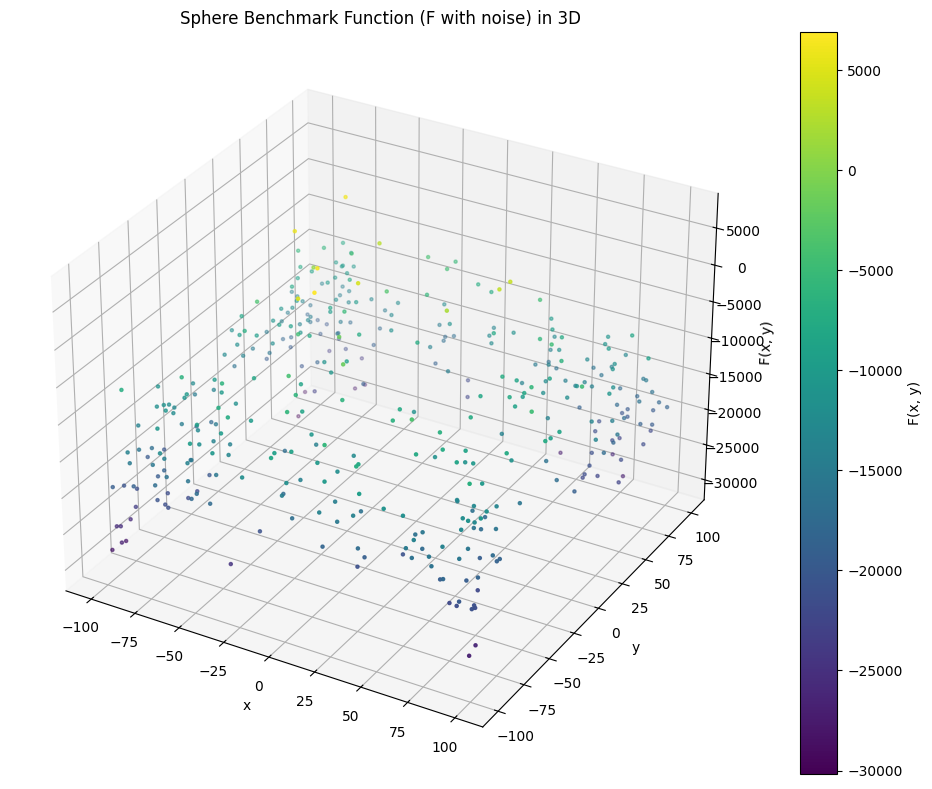

In [37]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df_sampled["x"], df_sampled["y"], df_sampled["F"], c=df_sampled["F"], cmap="viridis", s=5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('F(x, y)')
fig.colorbar(sc, ax=ax, label="F(x, y)")
ax.set_title("Sphere Benchmark Function (F with noise) in 3D")
plt.tight_layout()
plt.show()
